In [3]:
import pandas as pd

teledata_location = 'H:\\OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey\\MachineLearning_Extern\\ClassContent\\Reto\\Matrices de Viaje para Santiago Chile\\DataSet\\'

df = pd.read_csv(teledata_location + '20210101_RM.csv')  

In [3]:
df.head()

,PHONE_ID,timestamp,bts_id,lat,lon
0,668f7c17a62c937a75f762c7198a7fc98ed4e0e0c64ce0...,2021-01-01T17:22:55.000-03:00,CEMG1,-33.3913,-70.6222
1,780fc36e9a2bc99de12adb740e5e82b3cabba75c1ecd23...,2021-01-01T17:10:19.000-03:00,CEMG1,-33.3913,-70.6222
2,b3c52936d4f8494dae9d1158ce76951e62413d511f5fe2...,2021-01-01T00:35:04.000-03:00,CEMG1,-33.3913,-70.6222
3,a4ab622fe4c0de513c389ab475cee4ad5b5d27e07e32d9...,2021-01-01T17:22:38.000-03:00,CEMG1,-33.3913,-70.6222
4,77d8edaa34e7ac318ef33541957e9f33826dff24217636...,2021-01-01T17:11:12.000-03:00,CEMG1,-33.3913,-70.6222


In [6]:
df['bts_id'].unique().size

1871

In [9]:
list_bts_id = df['bts_id'].unique()
list_phone_id = df['PHONE_ID'].unique()

In [10]:
df_groupby_bts = df.groupby(['bts_id', 'lat', 'lon']).size().reset_index(name='counts_per_bts')

In [12]:
df_groupby_bts

bts_lat_list = []
bts_lon_list = []
for bts in list_bts_id:
    bts_lat_list.append(df[df['bts_id'] == bts]['lat'][0])
    bts_lon_list.append(df[df['bts_id'] == bts]['lon'][0])
bts_lat_list


KeyError: 0

In [7]:
df['PHONE_ID'].unique().size

1353435

In [8]:
df['timestamp'].max()

'2021-01-01T23:59:59.000-03:00'

In [4]:
df_phone_appear = df.groupby(['PHONE_ID']).size().reset_index(name='counts')
df_phone_appear

,PHONE_ID,counts
0,00000000e3fc09803d408609f55cbf905120d3a41db564...,92
1,0000100159b099202b52b3ee8ee7130f2c5f283591f611...,54
2,00001cca3bf53b8226459edf445ca46ffae00c53d39d82...,70
3,000023f38ae28f3bf87393e0cea45bd598018e7782b3fe...,40
4,000024f02222fc76dfad8db70b19a6094177807362a862...,53
...,...,...
1353430,ffffa11de56df5b3ac085b7a84e90af1553d6cc604f43b...,16
1353431,ffffa17bcc4a44837795dbee241e641b0bf6e0f0f45408...,13
1353432,ffffd2e21a16bc902e5e242aef7d68cbbb824a82b7efa8...,48
1353433,ffffdecede452ab62eeeff9cfc2a57c8a8c0396c671a06...,34


array([[<AxesSubplot:title={'center':'counts'}>]], dtype=object)

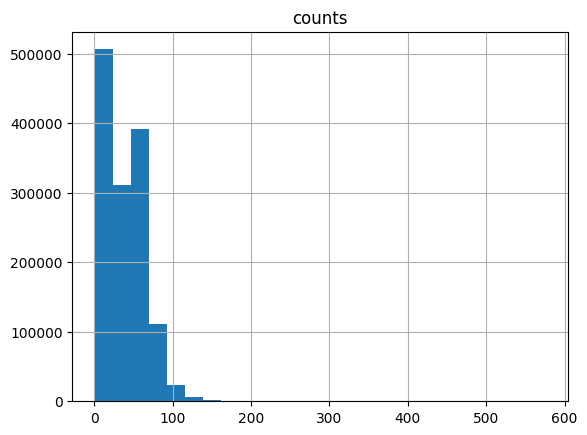

In [6]:
df_phone_appear.hist(column='counts', bins=25)

In [7]:
df_phone_appear['counts'].describe()

count    1.353435e+06
mean     3.666089e+01
std      2.784613e+01
min      1.000000e+00
25%      1.100000e+01
50%      3.700000e+01
75%      5.400000e+01
max      5.760000e+02
Name: counts, dtype: float64

In [9]:
df['timestamp'].min()

'2021-01-01T00:00:00.000-03:00'

In [4]:
df.describe()

,lat,lon
count,4.961813e+07,4.961813e+07
mean,-3.349199e+01,-7.068545e+01
std,1.219281e-01,1.482997e-01
min,-3.402680e+01,-7.148880e+01
25%,-3.356200e+01,-7.073630e+01
50%,-3.346940e+01,-7.066010e+01
75%,-3.341880e+01,-7.058930e+01
max,-3.292550e+01,-7.005880e+01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49618132 entries, 0 to 49618131
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   PHONE_ID   object 
 1   timestamp  object 
 2   bts_id     object 
 3   lat        float64
 4   lon        float64
dtypes: float64(2), object(3)
memory usage: 1.8+ GB
